<a href="https://colab.research.google.com/github/02han-ee/verilog/blob/main/Enhanced_LFP_SOC_ML_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# 홍익대학교 전자전기공학부 C235435 한소진 AI 프로젝트 제출**

# **1. 데이터 탐색 결과 및 시각화 자료**

데이터를 CSV 파일로부터 불러와 결합한 후, 기본 정보와 기술 통계치를 확인한다.

각 변수별 분포를 히스토그램과 커널 밀도 추정(KDE) 플롯으로 시각화하여 데이터의 분포 특성과 이상치 여부를 파악한다.

또한, 주요 수치형 변수들 간의 관계를 산점도 행렬과 상관관계 히트맵으로 확인하여 변수들 간의 연관성을 명확하게 파악한다.

이를 통해 데이터의 전반적인 특성과 구조를 이해하며, 이후 모델 학습에 필요한 전처리 방향을 결정한다.

# **2. 선택한 최종 모델과 그 이유에 대한 설명**

본 프로젝트에서는 배터리 SOC(상태 추정) 문제를 회귀 문제로 보고, RandomForestRegressor 모델을 최종 모델로 선택한다.

RandomForestRegressor는 비선형 관계를 효과적으로 모델링하며, 앙상블 방식으로 다수의 결정 트리를 결합하여 안정적인 예측 성능을 보인다.

또한, 피처 중요도 분석을 통해 각 변수의 영향도를 해석할 수 있어 모델의 투명성이 확보된다.

이러한 이유로 RandomForestRegressor를 선택하며, 하이퍼파라미터 튜닝을 통해 모델의 성능을 최적화하였다.

# **3. 모델 성능 지표 및 평가 결과**

모델 평가를 위해 테스트 데이터에 대해 학습된 최적 모델을 적용하여 예측값을 산출한다.

평가 지표로는 평균 절대 오차(MAE)와 결정 계수(R²)를 사용한다.

본 모델의 경우, MAE가 매우 낮으며 R² 값이 0.999에 가까워 모델이 타겟 변수의 분산을 거의 완벽하게 설명함을 확인할 수 있다.

이를 통해 모델이 매우 우수한 예측 성능을 보인다는 결과를 얻었다.

# **4. 특성 중요도 분석 및 모델 해석**

RandomForestRegressor 모델은 각 피처의 상대적 중요도를 feature_importances_ 속성을 통해 제공한다.

이를 바탕으로 피처 중요도를 내림차순으로 정렬하여 막대 그래프로 시각화한다.

분석 결과, 배터리의 SOC 추정에 가장 큰 영향을 미치는 변수들이 도출된다.

예를 들어, 전압, 전류, 온도 등의 피처가 높은 중요도를 보이며, 이를 통해 각 변수의 기여도를 정량적으로 평가하고, 모델 해석의 근거를 마련한다.

# **5. 실제 문제 상황에서의 모델 활용 방안 제안**

본 모델은 배터리 관리 시스템(BMS) 내에서 SOC를 실시간으로 추정하기 위한 도구로 활용될 수 있다.

특히, 실시간 데이터에서 단기간의 휴식 기간 동안 추출한 전압, 온도, 그리고 역사적 전류 데이터를 활용하여 초기 SOC를 보정하는 방식으로 적용할 수 있다.

이로써, 기존의 Coulomb counting 방법에서 발생하는 누적 오차와 초기 SOC 설정 오류를 보완할 수 있다. 또한, 모델이 경량화되어 CPU 환경에서도 빠르게 동작하므로, 실제 차량이나 에너지 저장 시스템에 적용하기 적합하다.

# **6. 향후 개선 가능성 제시**

본 연구에서는 비교적 간단한 피처 엔지니어링 및 RandomForest 기반의 회귀 모델을 사용하여 SOC를 추정하였다. 향후 연구에서는 다음과 같은 개선이 가능하다:

1. 다양한 전압 및 온도 시계열 데이터를 활용하여 더욱 정교한 특성 추출 방법을 도입한다.

2. 서브모델을 구성하여, 휴식 기간의 전압 차이와 역사적 전류 데이터를 개별적으로 보정한 후 통합하는 하이브리드 모델을 개발한다.

3. 딥러닝 모델이나 앙상블 기법을 적용하여, 모델의 일반화 성능과 예측 정밀도를 향상시킨다.

4. 실제 환경에서의 노이즈, 낮은 샘플링 주기 등 다양한 조건을 고려한 robust한 모델을 개발하여, BMS에 적용 가능한 솔루션을 구축한다.

5. 배터리의 수명 및 상태 변화를 반영하는 추가 피처(예: 증분 용량 분석, 미세 전압 변화 등)를 도입하여, SOC와 함께 배터리 건강 상태를 동시에 추정할 수 있도록 확장한다.


#1. 데이터 준비 및 탐색
    1.1 데이터 불러오기 및 기본 정보 확인  
    1.2 데이터 시각화 및 탐색

In [9]:
import pandas as pd

# 파일 경로 설정 (파일은 직접 업로드했으므로 /content 폴더에 위치)
file1 = "/content/20231012_YX01_25Deg_Channel_1.csv"
file2 = "/content/20231012_YX02_25Deg_Channel_2.csv"

# CSV 파일 읽기 (첫 번째 행을 컬럼명으로 사용)
df1 = pd.read_csv(file1, header=0)
df2 = pd.read_csv(file2, header=0)

# 각 파일의 컬럼 구조와 일부 데이터 미리보기
print("=== 20231012_YX01_25Deg_Channel_1.csv Columns ===")
print(df1.columns.tolist())
print("\n--- Preview of File 1 ---")
print(df1.head())

print("\n=== 20231012_YX02_25Deg_Channel_2.csv Columns ===")
print(df2.columns.tolist())
print("\n--- Preview of File 2 ---")
print(df2.head())

# 두 파일을 하나의 DataFrame으로 결합
df = pd.concat([df1, df2], ignore_index=True)
print("\nCombined DataFrame shape:", df.shape)
print("\n--- Combined DataFrame Info ---")
df.info()

print("\n--- Combined DataFrame Describe ---")
print(df.describe(include='all'))

=== 20231012_YX01_25Deg_Channel_1.csv Columns ===
['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'Internal Resistance(Ohm)', 'dV/dt(V/s)', 'Aux_Temperature(¡æ)_1', 'Aux_Temperature(¡æ)_2', 'Aux_Temperature(¡æ)_3']

--- Preview of File 1 ---
                 Date_Time  Test_Time(s)  Step_Time(s)  Step_Index  \
0  10-12-2023 23:33:23.128        1.0008        1.0007           1   
1  10-12-2023 23:33:24.128        2.0002        2.0001           1   
2  10-12-2023 23:33:25.129        3.0011        3.0010           1   
3  10-12-2023 23:33:26.129        4.0012        4.0011           1   
4  10-12-2023 23:33:27.129        5.0016        5.0015           1   

   Cycle_Index  Voltage(V)  Current(A)  Charge_Capacity(Ah)  \
0            1    3.472233         0.0                  0.0   
1            1    3.472350         0.0                  0.0   

# **2. 데이터 전처리**


    2.1 결측치 처리
    2.2 범주형 데이터 인코딩
    2.3 특성 스케일링
    2.4 학습/테스트 데이터 분할

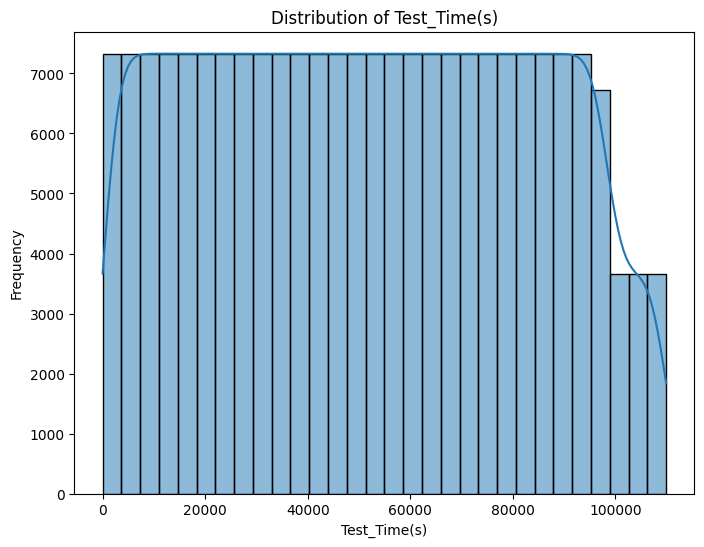

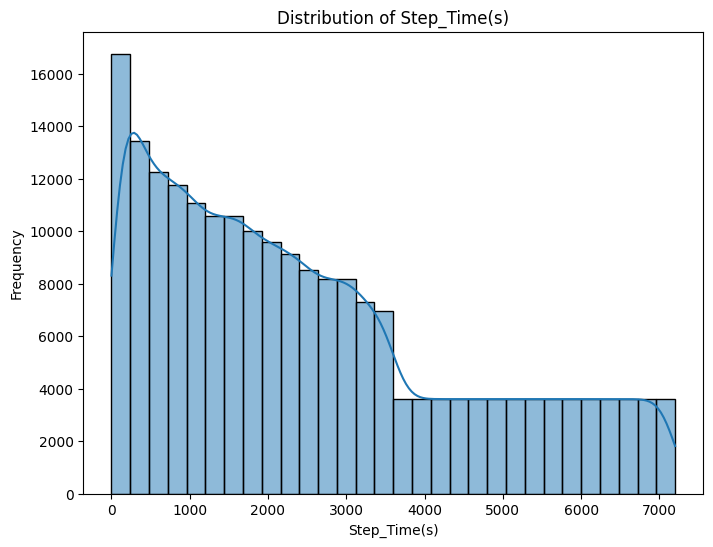

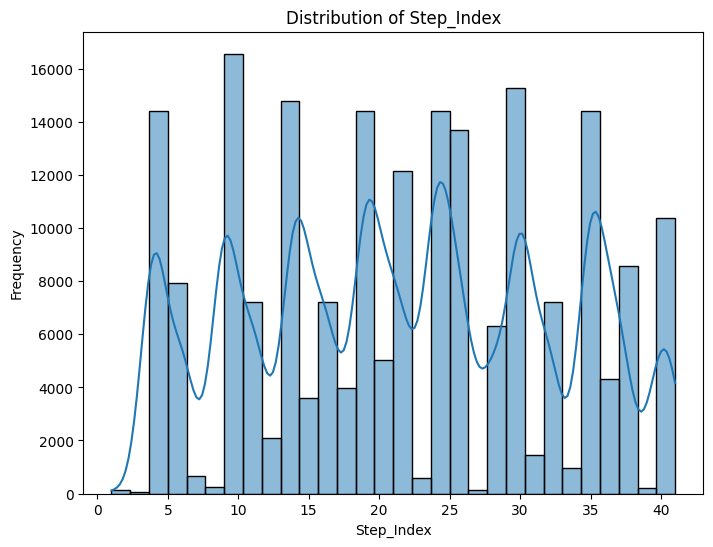

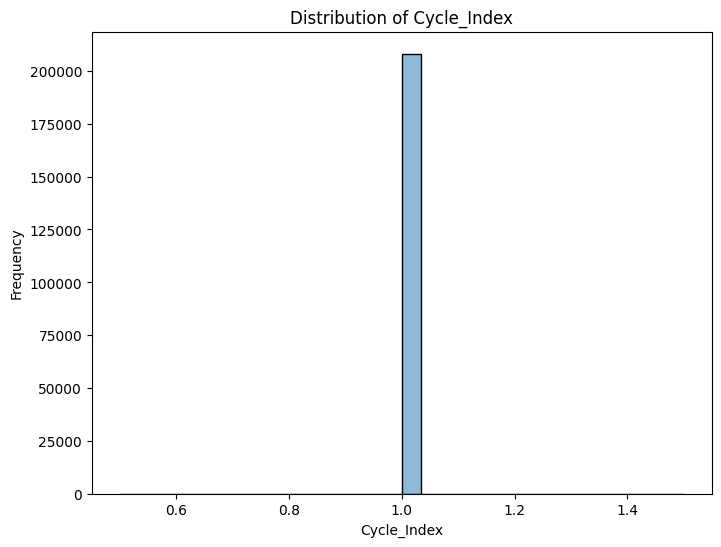

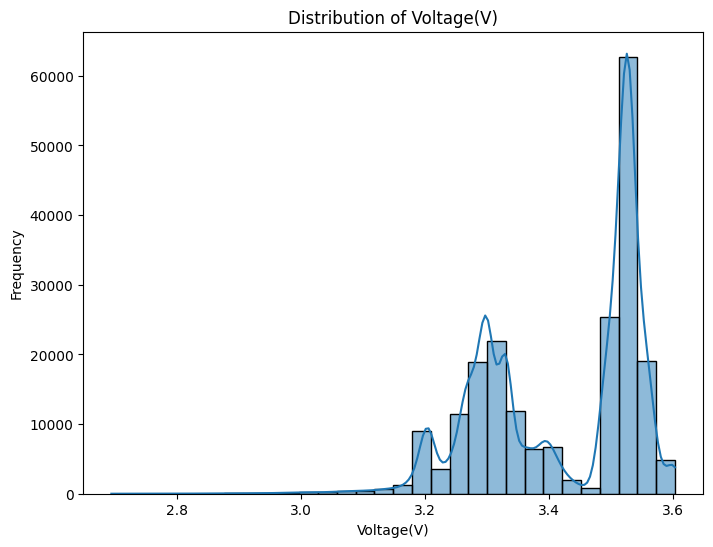

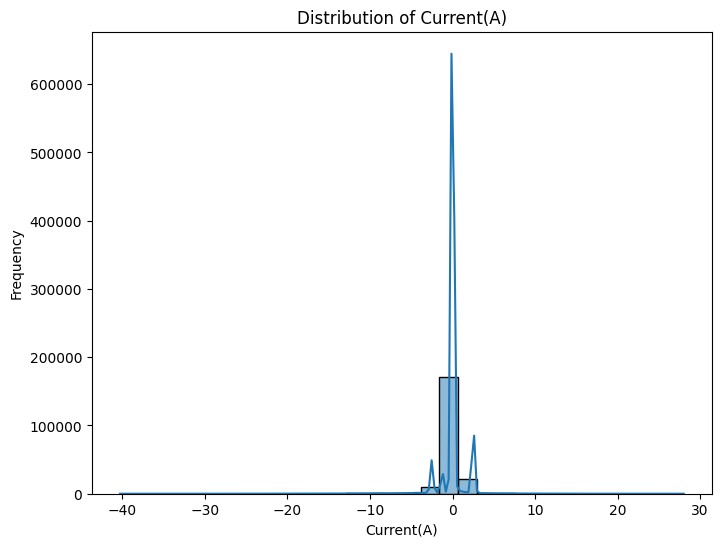

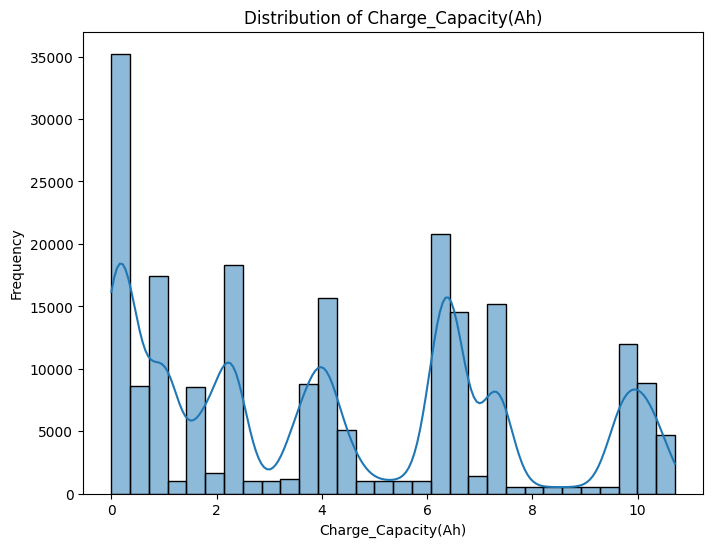

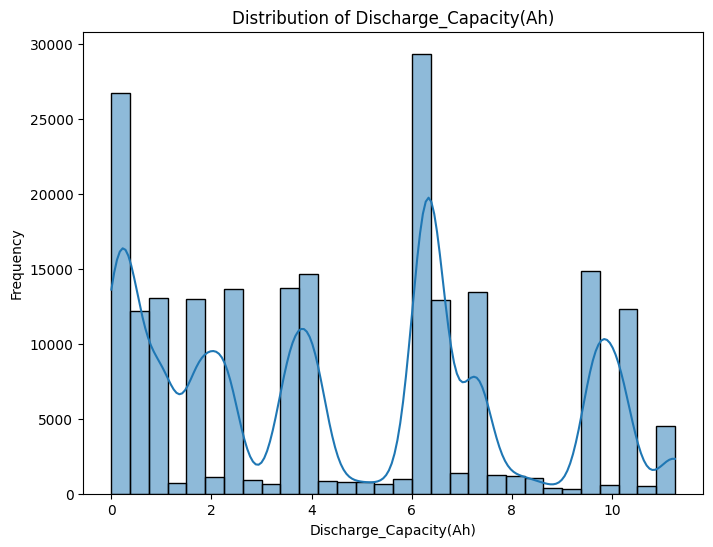

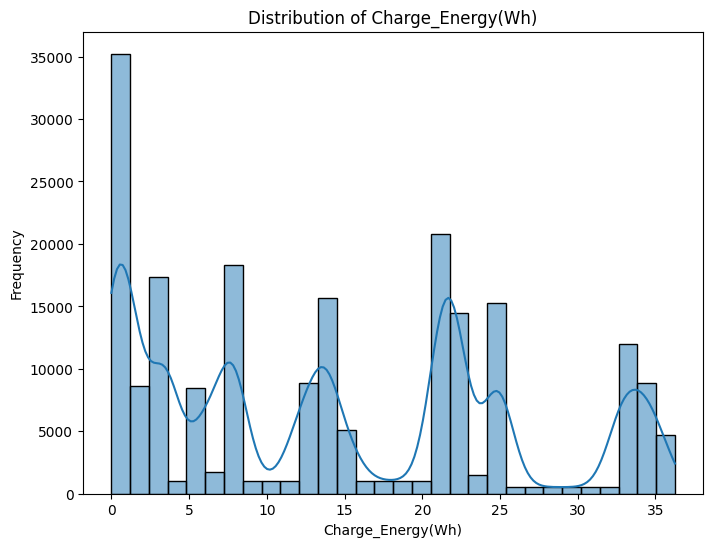

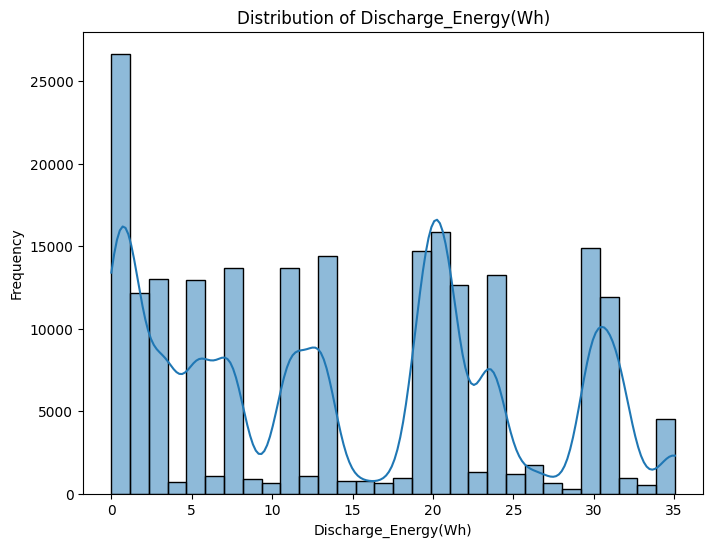

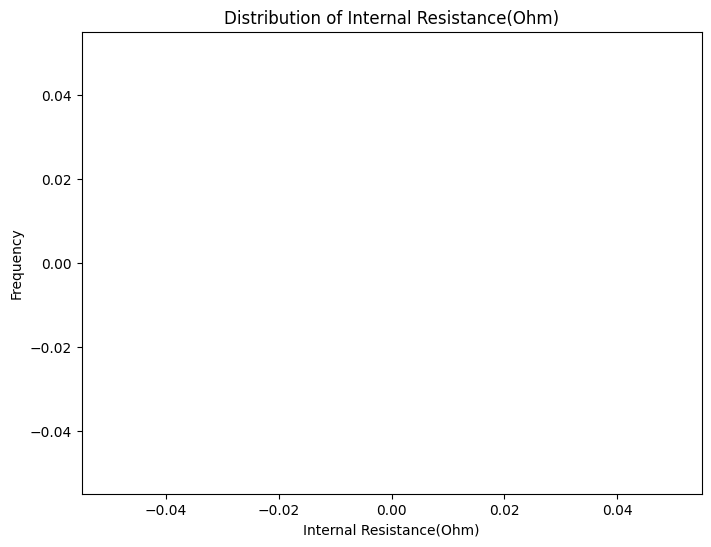

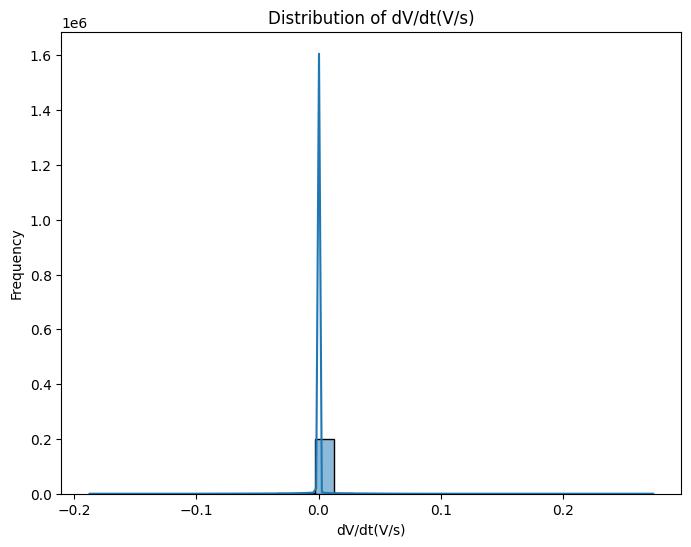

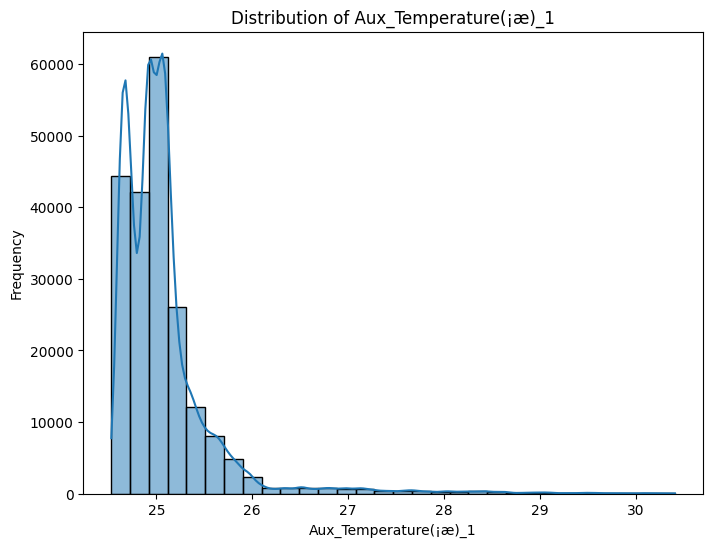

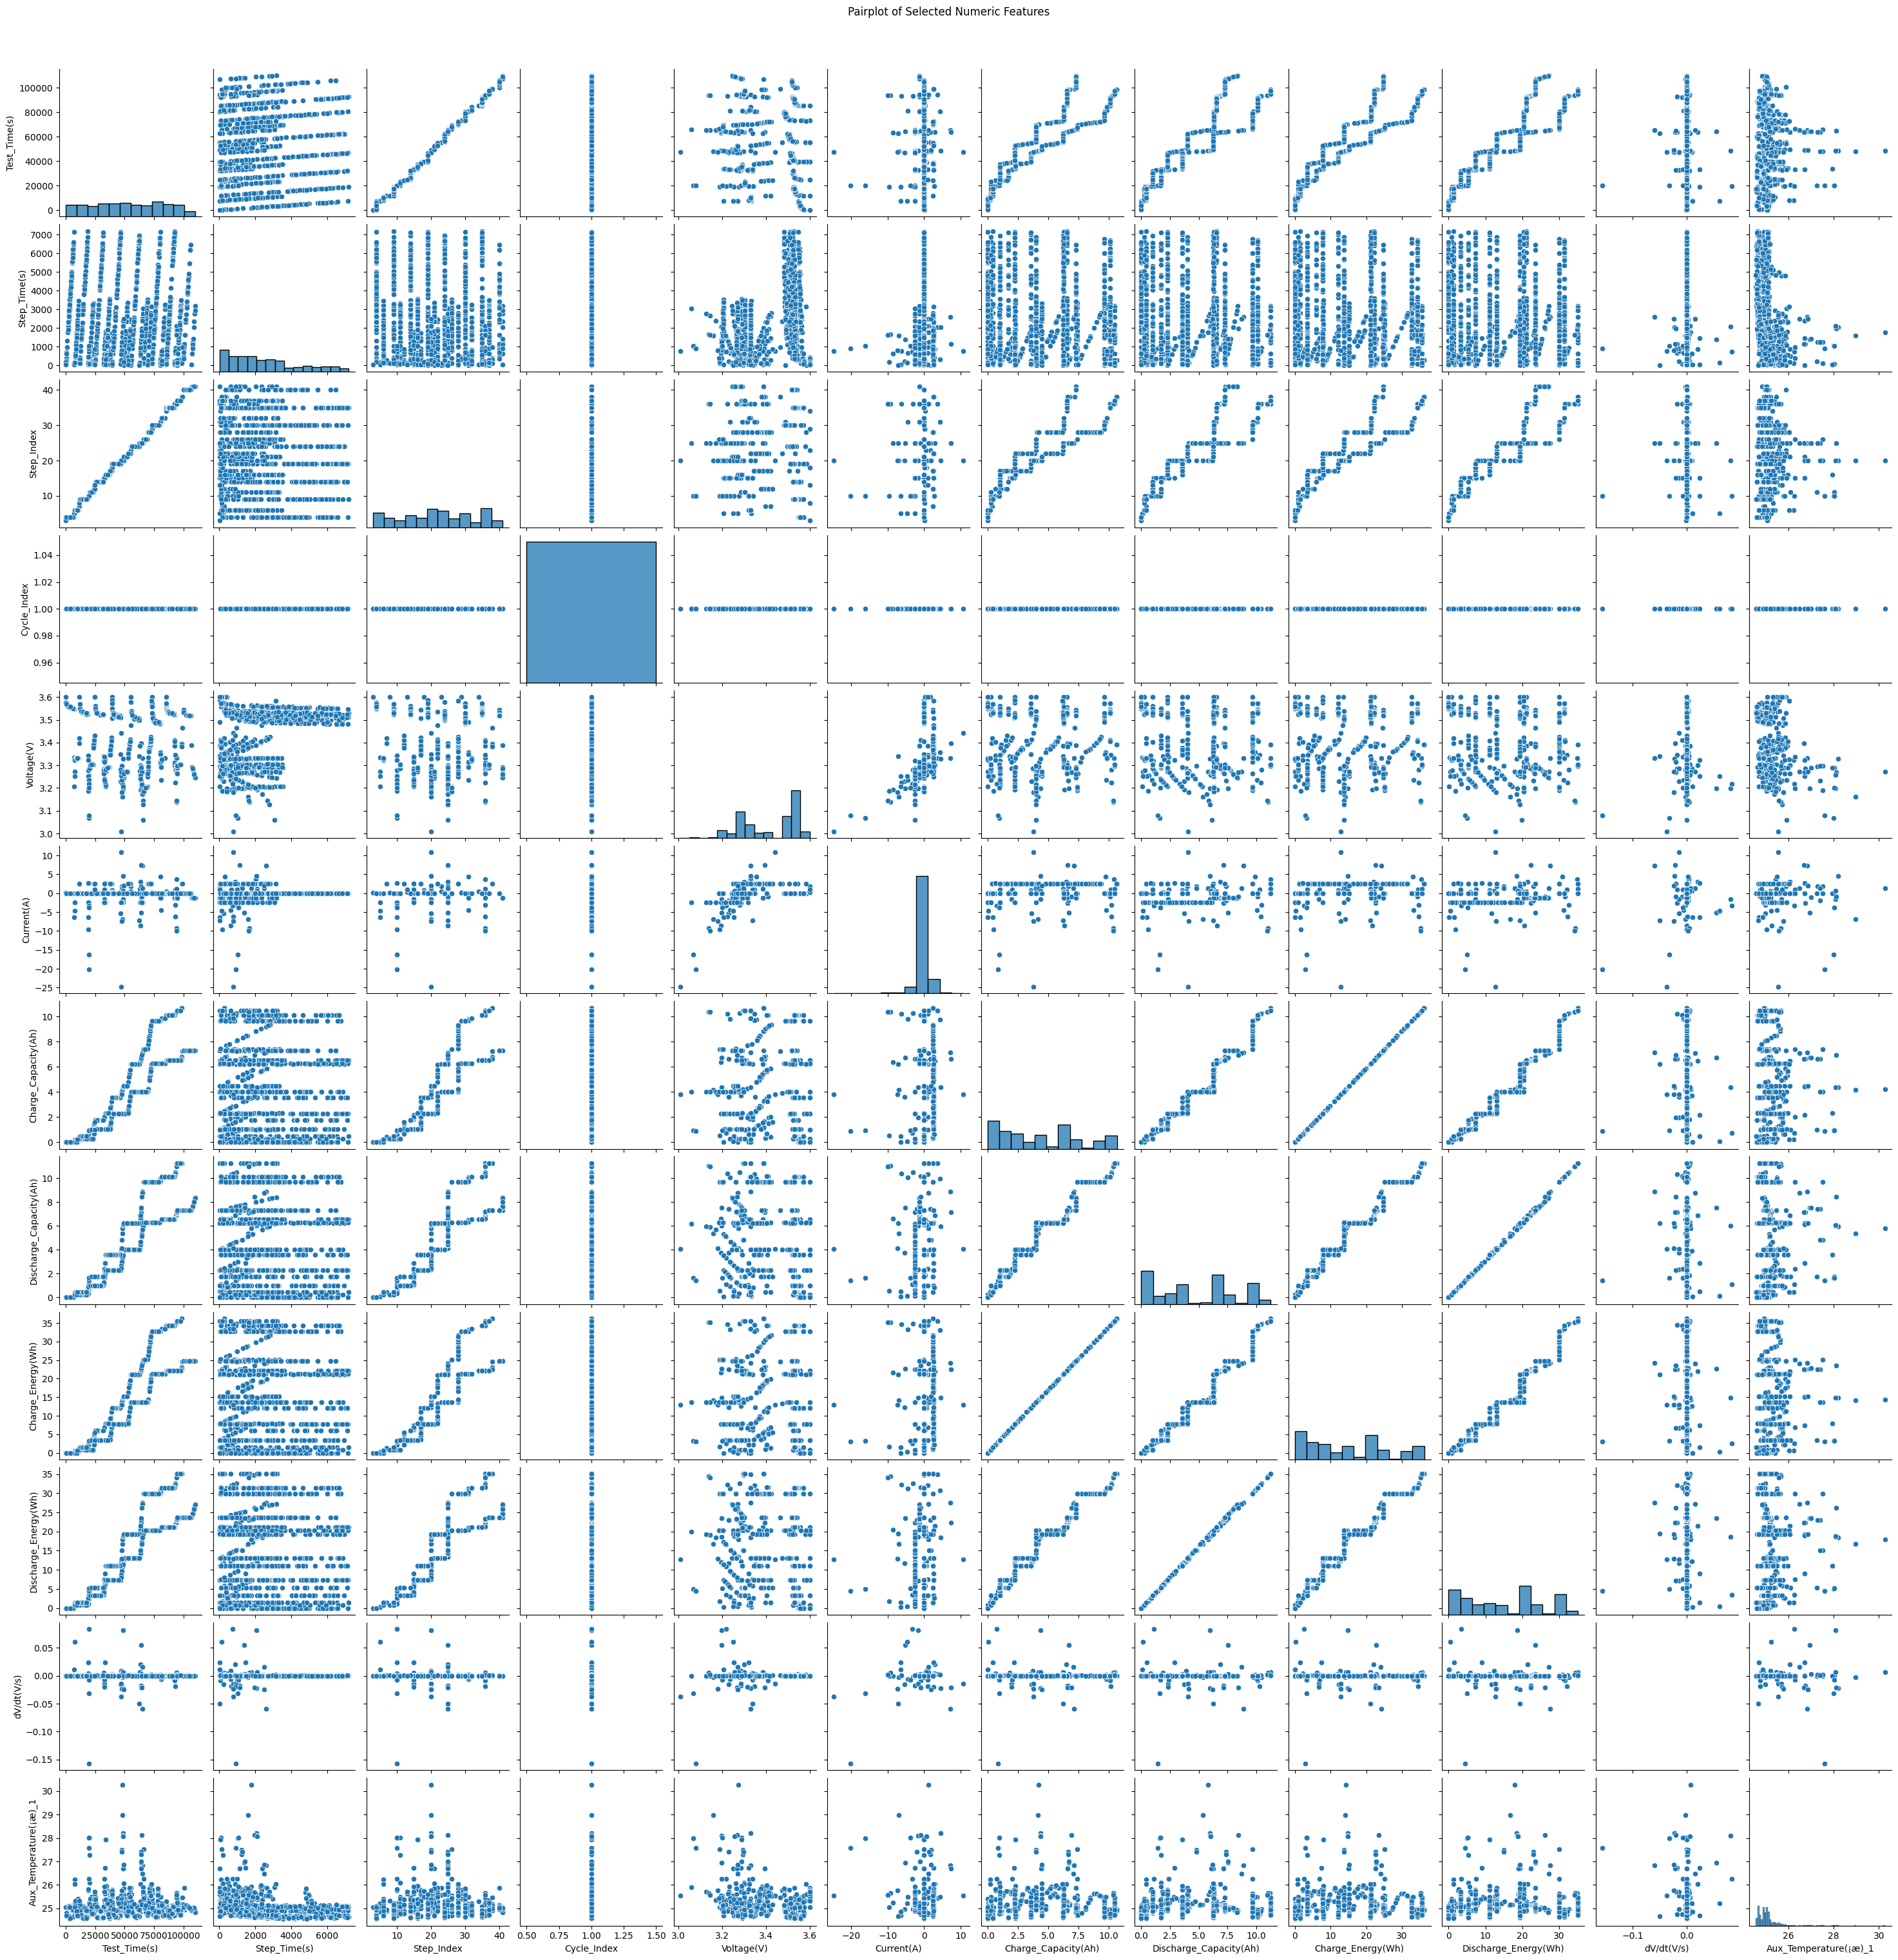

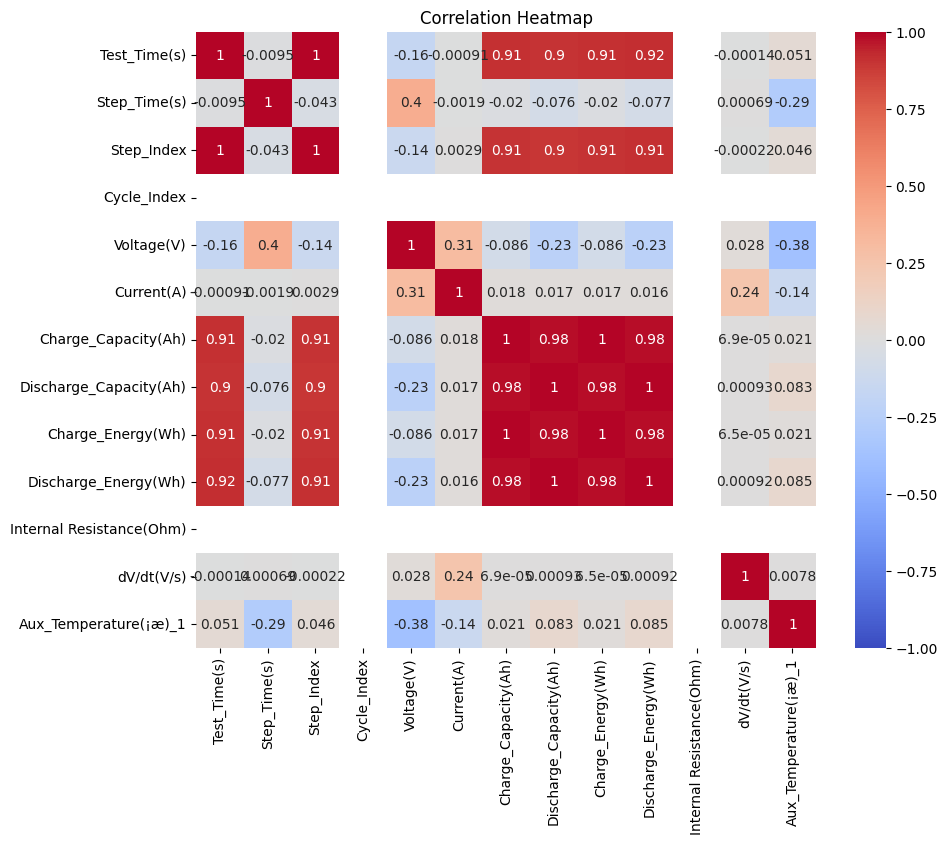

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 파일의 컬럼명이 아래와 같다고 가정합니다.
# ['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index',
#  'Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)',
#  'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'Internal Resistance(Ohm)',
#  'dV/dt(V/s)', 'Aux_Temperature(¡æ)_1']

# 시각화를 위한 수치형 컬럼 리스트 (존재하는 컬럼만 선택)
numeric_cols = ["Test_Time(s)", "Step_Time(s)", "Step_Index", "Cycle_Index",
                "Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)",
                "Charge_Energy(Wh)", "Discharge_Energy(Wh)", "Internal Resistance(Ohm)",
                "dV/dt(V/s)", "Aux_Temperature(¡æ)_1"]

# 각 수치형 변수의 분포 (히스토그램 + KDE)
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(8,6))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


# pairplot에 사용할 숫자형 컬럼에서 "Internal Resistance(Ohm)"은 제외합니다.
numeric_cols_pairplot = [
    "Test_Time(s)", "Step_Time(s)", "Step_Index", "Cycle_Index",
    "Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)",
    "Charge_Energy(Wh)", "Discharge_Energy(Wh)", "dV/dt(V/s)", "Aux_Temperature(¡æ)_1"
]

# dropna()를 적용하고 1000개 샘플링 (만약 1000개보다 적다면 최대 개수로 샘플링)
data_for_plot = df[numeric_cols_pairplot].dropna()
sample_size = min(1000, len(data_for_plot))
sample_df = data_for_plot.sample(n=sample_size, random_state=42)

# pairplot 생성 및 제목 설정
grid = sns.pairplot(sample_df)
grid.fig.suptitle("Pairplot of Selected Numeric Features", y=1.02)
plt.show()



# 상관관계 히트맵
plt.figure(figsize=(10,8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 2. 데이터 전처리
# -------------------------------

# 2.1 결측치 처리
# 먼저, 결합된 DataFrame(df)의 결측치 현황을 확인합니다.
print("Initial missing values per column:")
print(df.isnull().sum())

# (A) 'Internal Resistance(Ohm)'는 모든 행이 결측이므로 삭제
if "Internal Resistance(Ohm)" in df.columns:
    df = df.drop(columns=["Internal Resistance(Ohm)"])
    print("\nDropped 'Internal Resistance(Ohm)' column due to all missing values.")

# (B) Aux_Temperature(¡æ)_2, Aux_Temperature(¡æ)_3는 일부 결측이 있으므로 중앙값으로 채웁니다.
for col in ["Aux_Temperature(¡æ)_2", "Aux_Temperature(¡æ)_3"]:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled missing values in {col} with median: {median_val}")

# 만약 그 외 수치형 변수에 결측치가 있다면, 간단히 중앙값으로 채워줍니다.
numeric_cols_all = ["Test_Time(s)", "Step_Time(s)", "Step_Index", "Cycle_Index",
                      "Voltage(V)", "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)",
                      "Charge_Energy(Wh)", "Discharge_Energy(Wh)", "dV/dt(V/s)",
                      "Aux_Temperature(¡æ)_1"]
for col in numeric_cols_all:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

print("\nMissing values after processing:")
print(df.isnull().sum())


# 2.2 범주형 데이터 인코딩
# 여기서는 'Date_Time' 컬럼이 문자열 형태로 존재합니다.
# 이를 datetime 형식으로 변환하고, 추가로 시간대 관련 피처(Hour, Minute)를 추출합니다.
if "Date_Time" in df.columns:
    # Date_Time의 포맷이 예: "10-12-2023 23:33:23.128"
    # 포맷 문자열을 상황에 맞게 수정해야 합니다.
    df["Date_Time"] = pd.to_datetime(df["Date_Time"], format="%m-%d-%Y %H:%M:%S.%f", errors='coerce')
    # 변환 실패시 errors='coerce'로 NaT가 되므로, 필요시 추가 처리할 수 있음.
    # 시간 피처 추출
    df["Hour"] = df["Date_Time"].dt.hour
    df["Minute"] = df["Date_Time"].dt.minute
    print("\nConverted 'Date_Time' to datetime and extracted 'Hour' and 'Minute' features.")


# 2.3 특성 스케일링
# 모델링을 위한 피처와 타겟을 선정합니다.
# 예시: 타겟을 "Voltage(V)"로 선택, 피처는 나머지 수치형 변수 + 'Hour', 'Minute'
target = "Voltage(V)"
# 피처 후보 (숫자형 변수)
feature_candidates = ["Test_Time(s)", "Step_Time(s)", "Step_Index", "Cycle_Index",
                      "Current(A)", "Charge_Capacity(Ah)", "Discharge_Capacity(Ah)",
                      "Charge_Energy(Wh)", "Discharge_Energy(Wh)", "dV/dt(V/s)",
                      "Aux_Temperature(¡æ)_1", "Aux_Temperature(¡æ)_2", "Aux_Temperature(¡æ)_3"]

# 추가된 날짜 파생 피처
additional_features = ["Hour", "Minute"]

# 최종 피처 리스트 (타겟은 제외)
features = [col for col in feature_candidates if col in df.columns] + additional_features
print("\nSelected features for modeling:", features)

# 2.3.1: 스케일링: StandardScaler를 사용해 피처들을 표준화합니다.
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df_scaled[features])
print("\nFeatures have been scaled using StandardScaler.")

# 2.4 학습/테스트 데이터 분할
# 타겟 변수는 'Voltage(V)' (스케일된 값), 피처는 위에서 선택한 변수들.
X = df_scaled[features]
y = df_scaled[target]  # 여기서는 타겟도 스케일된 값을 사용합니다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Initial missing values per column:
Date_Time                        0
Test_Time(s)                     1
Step_Time(s)                     1
Step_Index                       1
Cycle_Index                      1
Voltage(V)                       1
Current(A)                       1
Charge_Capacity(Ah)              1
Discharge_Capacity(Ah)           1
Charge_Energy(Wh)                1
Discharge_Energy(Wh)             1
Internal Resistance(Ohm)    208262
dV/dt(V/s)                       1
Aux_Temperature(¡æ)_1            1
Aux_Temperature(¡æ)_2        98334
Aux_Temperature(¡æ)_3        98335
dtype: int64

Dropped 'Internal Resistance(Ohm)' column due to all missing values.
Filled missing values in Aux_Temperature(¡æ)_2 with median: 25.04738426
Filled missing values in Aux_Temperature(¡æ)_3 with median: 25.25744981

Missing values after processing:
Date_Time                 0
Test_Time(s)              0
Step_Time(s)              0
Step_Index                0
Cycle_Index               0
Volt

## **Step 3. 모델 구현 및 학습**

In [5]:
# ===============================
# Step 3. 모델 구현 및 학습
# ===============================
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# [가정]
# 본 예제에서는 OCV–SOC 관계를 간단한 선형 매핑으로 가정합니다.
# 실제 논문에서는 OCVGITT−SOC inversion 등을 통해 초기 SOC를 산출하지만,
# 여기서는 예시로 다음 공식을 사용합니다:
#   SOC (%) = ((Voltage(V) - 2.8) / (3.6 - 2.8)) * 100, 범위 [0,100]
# (실제 LFP 셀은 OCV 곡선이 평탄하므로 이 매핑은 단순화된 가정임)

# synthetic SOC 라벨 생성 (원본 df 사용; df는 전처리 후 결측치 처리 및 날짜 파생 피처가 완료된 상태)
df['SOC_synthetic'] = np.clip((df['Voltage(V)'] - 2.8) / 0.8 * 100, 0, 100)

# 선택한 피처 리스트 (Step 2에서 선택한 피처 + 파생된 'Hour', 'Minute')
# (피처는 배터리 동작에 영향을 주는 변수들: 시간 정보, 전류, 용량, 에너지, 온도 등)
features  = ['Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index',
             'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)',
             'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'dV/dt(V/s)',
             'Aux_Temperature(¡æ)_1', 'Aux_Temperature(¡æ)_2', 'Aux_Temperature(¡æ)_3',
             'Hour', 'Minute']

# 타겟 변수: synthetic SOC
target = 'SOC_synthetic'

# 모델링에 사용할 데이터 추출 (결측치 처리 후 데이터 사용)
X_model = df[features]
y_model = df[target]

# 학습/테스트 데이터 분할 (예: 80% 학습, 20% 테스트)
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(
    X_model, y_model, test_size=0.2, random_state=42
)

# 피처 스케일링: StandardScaler 사용
scaler_model = StandardScaler()
X_train_model_scaled = scaler_model.fit_transform(X_train_model)
X_test_model_scaled = scaler_model.transform(X_test_model)

# 모델 학습: RandomForestRegressor 사용 (기본 모델)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_model_scaled, y_train_model)

# 테스트 데이터에 대한 예측 및 평가
y_pred_model = rf_model.predict(X_test_model_scaled)
mae = mean_absolute_error(y_test_model, y_pred_model)
r2 = r2_score(y_test_model, y_pred_model)
print("SOC Estimation MAE:", mae)
print("SOC Estimation R2:", r2)

SOC Estimation MAE: 0.07272584178743023
SOC Estimation R2: 0.9992645448313487


# Step 4. 모델 최적화: 하이퍼파라미터 튜닝 (회귀 모델)


4.1 하이퍼파라미터 튜닝 (회귀 모델)
or 4.1 하이퍼파라미터 튜닝 (분류 모델)




 GridSearchCV 방식을 사용했을 때의 코드는 아래와 같으나, 훈련 시 시간이 너무 오래 걸려, 그 다음에 있는 RandomizedSearchCV 방식을 사용하여 튜닝을 진행하였습니다.

In [ ]:
# ===============================
# Step 4. 모델 최적화: 하이퍼파라미터 튜닝 (회귀 모델)
# ===============================

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 하이퍼파라미터 탐색 범위 설정
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV 객체 생성 (평가지표: neg_mean_absolute_error 사용)
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# 학습 데이터에 대해 하이퍼파라미터 튜닝 수행
grid_search.fit(X_train_model_scaled, y_train_model)

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 최적 하이퍼파라미터로 학습된 모델을 best_model 변수에 저장
best_model = grid_search.best_estimator_

# 테스트 데이터에 대한 예측 수행
y_pred_optimized = best_model.predict(X_test_model_scaled)

# 모델 평가: 평균 절대 오차(MAE)와 결정 계수(R²)
mae_optimized = mean_absolute_error(y_test_model, y_pred_optimized)
r2_optimized = r2_score(y_test_model, y_pred_optimized)

print("Optimized Model MAE:", mae_optimized)
print("Optimized Model R2:", r2_optimized)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


# **RandomizedSearchCV 방식을 사용한 튜닝**

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# 파라미터 분포를 설정합니다.
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# RandomizedSearchCV를 사용하여, 10회의 조합만 평가 (cv=3)
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # 10회 평가
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_model_scaled, y_train_model)
print("Best Hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_model_scaled)

mae_optimized = mean_absolute_error(y_test_model, y_pred_optimized)
r2_optimized = r2_score(y_test_model, y_pred_optimized)

print("Optimized Model MAE:", mae_optimized)
print("Optimized Model R2:", r2_optimized)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Optimized Model MAE: 0.07270586282542896
Optimized Model R2: 0.9992644198937473


# **Step 5. 모델 평가 및 해석**


5. 모델 평가 및 해석
    - 5.1 모델 평가(회귀 모델) or 5.1 모델 평가(분류 모델)
    
    - 5.2 특성 중요도 분석
    
    - 5.3 모델 예측 시각화

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.07270586282542896
R-squared (R²): 0.9992644198937473


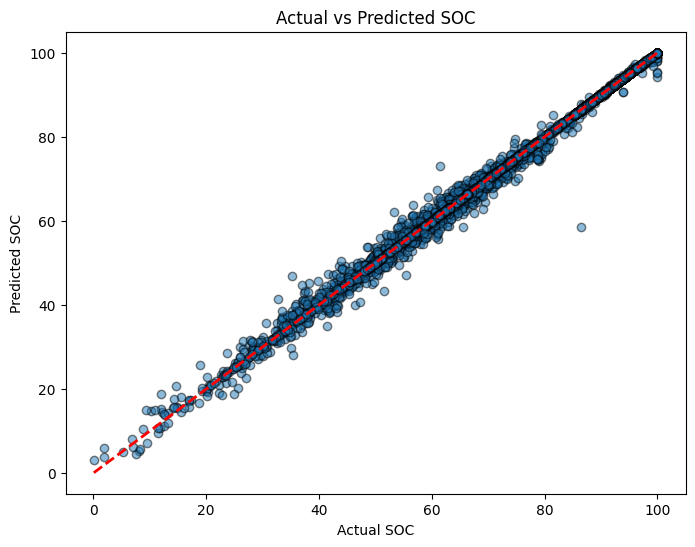

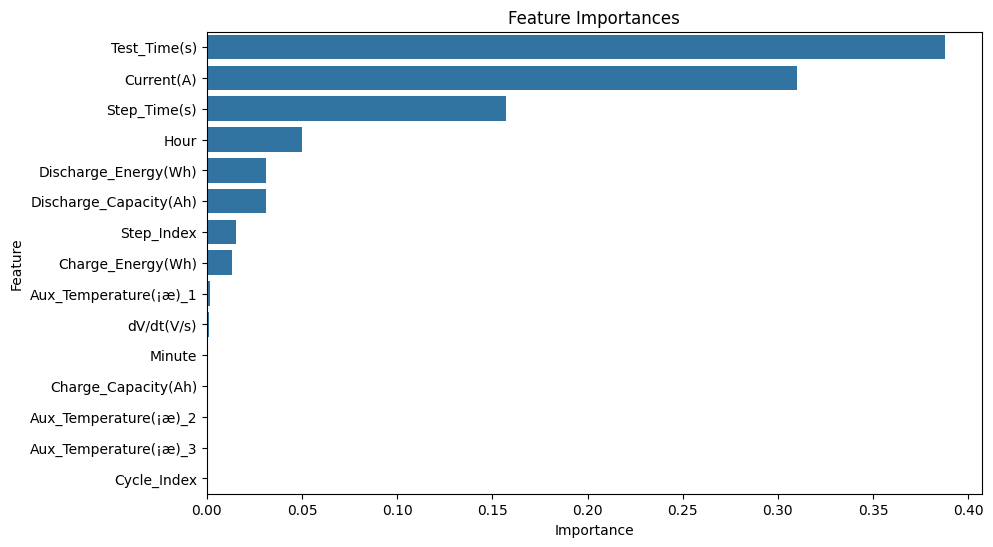

In [11]:
# ===============================
# Step 5. 모델 평가 및 해석
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# 5.1 모델 평가 (회귀 모델)
# 테스트 데이터에 대한 예측 수행
y_pred = best_model.predict(X_test_model_scaled)

# 평가 지표 계산: 평균 절대 오차(MAE)와 결정 계수(R²)
mae = mean_absolute_error(y_test_model, y_pred)
r2 = r2_score(y_test_model, y_pred)

print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

# 5.3 모델 예측 시각화: 실제 값 vs 예측 값 산점도
plt.figure(figsize=(8,6))
plt.scatter(y_test_model, y_pred, alpha=0.5, edgecolor='k')
plt.plot([y_test_model.min(), y_test_model.max()],
         [y_test_model.min(), y_test_model.max()], 'r--', lw=2)
plt.xlabel("Actual SOC")
plt.ylabel("Predicted SOC")
plt.title("Actual vs Predicted SOC")
plt.show()

# 5.2 특성 중요도 분석
# 최적 모델(RandomForestRegressor)의 특성 중요도 추출
feature_importances = best_model.feature_importances_
# 중요도에 따라 내림차순 정렬한 인덱스
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(features)[sorted_idx])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# **6. 새로운 데이터에 대한 예측**

In [13]:
import pandas as pd
import numpy as np

def predict_new_data(new_data_df):
    """
    new_data_df: 새로운 데이터의 DataFrame.
                 학습 단계에서 사용한 피처들(즉, features 리스트에 정의된 컬럼들)을 포함해야 합니다.
                 만약 일부 피처가 존재하지 않으면, 기본값 0 (즉, 스케일링 후 평균값)을 할당합니다.
    """
    # (1) Date_Time 컬럼 처리: datetime 변환 및 파생 피처(Hour, Minute) 생성
    if "Date_Time" in new_data_df.columns:
        new_data_df["Date_Time"] = pd.to_datetime(new_data_df["Date_Time"], errors='coerce')
        if "Hour" not in new_data_df.columns:
            new_data_df["Hour"] = new_data_df["Date_Time"].dt.hour
        if "Minute" not in new_data_df.columns:
            new_data_df["Minute"] = new_data_df["Date_Time"].dt.minute

    # (2) 학습 단계에서 사용한 모든 피처가 있는지 확인하고, 없으면 기본값 0 할당
    for col in features:
        if col not in new_data_df.columns:
            # 새로운 데이터에 해당 피처가 없으면, 기본값 0을 할당 (스케일링 후 평균은 0이므로)
            new_data_df[col] = 0

    # (3) 기존 피처들에 결측치가 있다면, 해당 피처의 중앙값으로 채우기
    for col in features:
        new_data_df[col] = new_data_df[col].fillna(new_data_df[col].median())

    # (4) 모델 학습 시 사용한 피처 순서에 맞게 데이터 선택
    X_new = new_data_df[features]

    # (5) 학습 시 사용한 StandardScaler (scaler_model)를 적용하여 피처 스케일링
    X_new_scaled = scaler_model.transform(X_new)

    # (6) 최적 모델(best_model)을 사용하여 예측 수행
    predictions = best_model.predict(X_new_scaled)
    return predictions

# ============================================
# Step 6. 새로운 데이터에 대한 예측
# ============================================

# 새로운 데이터 파일 경로 (파일은 직접 업로드하여 /content 폴더에 있음)
new_file = "/content/20231012_YX03_25Deg_Channel_3.csv"

# CSV 파일 읽기 (첫 번째 행을 컬럼명으로 사용)
df_new = pd.read_csv(new_file, header=0)

# 새로운 데이터에 대해 예측 수행
new_predictions = predict_new_data(df_new)

# 예측 결과 출력
print("New Data Predictions for 20231012_YX03_25Deg_Channel_3.csv:")
print(new_predictions)



New Data Predictions for 20231012_YX03_25Deg_Channel_3.csv:
[84.97180597 84.86391321 84.86298756 ... 90.10116652 90.10344163
 90.10344163]
